# Requirements

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 4.0 MB/s eta 0:01:39
   ---------------------------------------- 0.6/390.3 MB 7.0 MB/s eta 0:00:57
   ---------------------------------------- 2.3/390.3 MB 16.2 MB/s eta 0:00:25
    --------------------------------------- 6.3/390.3 MB 36.6 MB/s eta 0:00:11
    --------------------------------------- 9.3/390.3 MB 45.8 MB/s eta 0:00:09
   - -------------------------------------- 12.6/390.3 MB 93.0 MB/s eta 0:00:05
   - -------------------------------------- 12.6/390.3 MB 93.0 MB/s eta 0:00:05
   - -------------------------------------- 16.7/390.3 MB 59.8 MB/s eta 0:00:07
   - -------------------------------------- 17.0/390.3 MB 50.4 MB/s eta 0:00:08
   - -------------------------------------- 17.3/390.3 MB 40.9 MB/s eta 0:00:10
   - -------------------------------------- 17.6/390.3 MB 

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 667.8 kB/s eta 0:03:07
   ---------------------------------------- 0.2/124.9 MB 2.8 MB/s eta 0:00:46
   ---------------------------------------- 0.6/124.9 MB 4.8 MB/s eta 0:00:26
   ---------------------------------------- 1.4/124.9 MB 8.2 MB/s eta 0:00:16
    --------------------------------------- 2.4/124.9 MB 11.8 MB/s eta 0:00:11
    --------------------------------------- 2.7/124.9 MB 10.9 MB/s eta 0:00:12
    --------------------------------------- 3.0/124.9 MB 10.7 MB/s eta 0:00:12
   - -------------------------------------- 3.1/124.9 MB 10.0 MB/s eta 0:00:13
   - -------------------------------------- 3.5/124.9 MB 10.3 MB/s eta 0:00:12
   - -------------------------------------- 3.9/124.9 MB 9.6 MB/s eta 0

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [3]:
data = pd.read_csv('climate-data.csv')
data.sample(10)

,date,meantemp,humidity,wind_speed,meanpressure
813,2015-03-25,26.625000,65.625000,2.550000,1011.857143
160,2013-06-10,36.625000,42.750000,8.100000,995.125000
430,2014-03-07,18.500000,62.875000,6.712500,1017.125000
838,2015-04-19,32.125000,41.000000,4.175000,1003.875000
588,2014-08-12,32.125000,57.500000,8.337500,998.750000
1431,2016-12-02,19.208333,75.875000,4.945833,1017.750000
1365,2016-09-27,32.185185,57.814815,1.780769,1006.703704
84,2013-03-26,24.142857,44.571429,12.957143,1008.857143
269,2013-09-27,29.000000,71.250000,7.412500,1005.625000
548,2014-07-03,28.875000,75.125000,5.087500,998.285714


Explore the dataset using visualizations of your choice.

In [5]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr()

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.306468,-0.038818
humidity,-0.571951,1.000000,-0.373972,0.001734
wind_speed,0.306468,-0.373972,1.000000,-0.020670
meanpressure,-0.038818,0.001734,-0.020670,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [11]:
data = data.set_index('date')
data = data.sort_index()
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [13]:
lag = 3
for i in range(lag, 0, -1):
    data[[f'meantemp_prev_{i}', f'humidity_prev_{i}', f'wind_speed_prev_{i}', f'meanpressure_prev_{i}']] = data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].shift(i)

data

,meantemp,humidity,wind_speed,meanpressure,meantemp_prev_3,humidity_prev_3,wind_speed_prev_3,meanpressure_prev_3,meantemp_prev_2,humidity_prev_2,wind_speed_prev_2,meanpressure_prev_2,meantemp_prev_1,humidity_prev_1,wind_speed_prev_1,meanpressure_prev_1
date,,,,,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000
2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,14.000000,94.300000,9.085000,1014.350000,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217
2016-12-30,14.095238,89.666667,6.266667,1017.904762,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,6.000000,1016.904762


In [15]:
data.isnull().sum()

meantemp               0
humidity               0
wind_speed             0
meanpressure           0
meantemp_prev_3        3
humidity_prev_3        3
wind_speed_prev_3      3
meanpressure_prev_3    3
meantemp_prev_2        2
humidity_prev_2        2
wind_speed_prev_2      2
meanpressure_prev_2    2
meantemp_prev_1        1
humidity_prev_1        1
wind_speed_prev_1      1
meanpressure_prev_1    1
dtype: int64

In [17]:
data = data.dropna(axis=0)
data.head(10)

,meantemp,humidity,wind_speed,meanpressure,meantemp_prev_3,humidity_prev_3,wind_speed_prev_3,meanpressure_prev_3,meantemp_prev_2,humidity_prev_2,wind_speed_prev_2,meanpressure_prev_2,meantemp_prev_1,humidity_prev_1,wind_speed_prev_1,meanpressure_prev_1
date,,,,,,,,,,,,,,,,
2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667
2013-01-06,7.000000,82.800000,1.480000,1018.000000,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000
2013-01-07,7.000000,78.600000,6.300000,1020.000000,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000
2013-01-09,14.000000,51.250000,12.500000,1017.000000,7.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,8.857143,63.714286,7.142857,1018.714286
2013-01-10,11.000000,62.000000,7.400000,1015.666667,7.000000,78.600000,6.300000,1020.000000,8.857143,63.714286,7.142857,1018.714286,14.000000,51.250000,12.500000,1017.000000
2013-01-11,15.714286,51.285714,10.571429,1016.142857,8.857143,63.714286,7.142857,1018.714286,14.000000,51.250000,12.500000,1017.000000,11.000000,62.000000,7.400000,1015.666667
2013-01-12,14.000000,74.000000,13.228571,1015.571429,14.000000,51.250000,12.500000,1017.000000,11.000000,62.000000,7.400000,1015.666667,15.714286,51.285714,10.571429,1016.142857


In [ ]:
# features = [f'{feature}_prev_{i}' for feature in ['meantemp', 'humidity', 'wind_speed', 'meanpressure'] for i in range(lag, 0, -1)]

In [25]:
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [27]:
features

['meantemp', 'humidity', 'wind_speed', 'meanpressure']

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



meantemp Shape:  (1167, 3)
Epoch 1/20


C:\Users\223003\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2441 - mean_absolute_error: 0.4368 - mean_squared_error: 0.2441 - val_loss: 0.0102 - val_mean_absolute_error: 0.0767 - val_mean_squared_error: 0.0102
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - mean_absolute_error: 0.1026 - mean_squared_error: 0.0152 - val_loss: 0.0051 - val_mean_absolute_error: 0.0535 - val_mean_squared_error: 0.0051
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 - mean_absolute_error: 0.0690 - mean_squared_error: 0.0075 - val_loss: 0.0065 - val_mean_absolute_error: 0.0677 - val_mean_squared_error: 0.0065
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078 - mean_absolute_error: 0.0717 - mean_squared_error: 0.0078 - val_loss: 0.0033 - val_mean_absolute_error: 0.0446 - val_mean_squared_error: 0.0033
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - mean_absolute_error: 0.0568 - mean_squared_error: 0.0051 - val_loss: 0.0027 - val_mean_absolute_error: 0

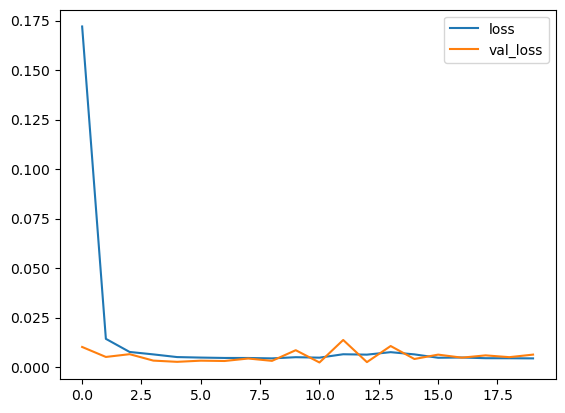

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


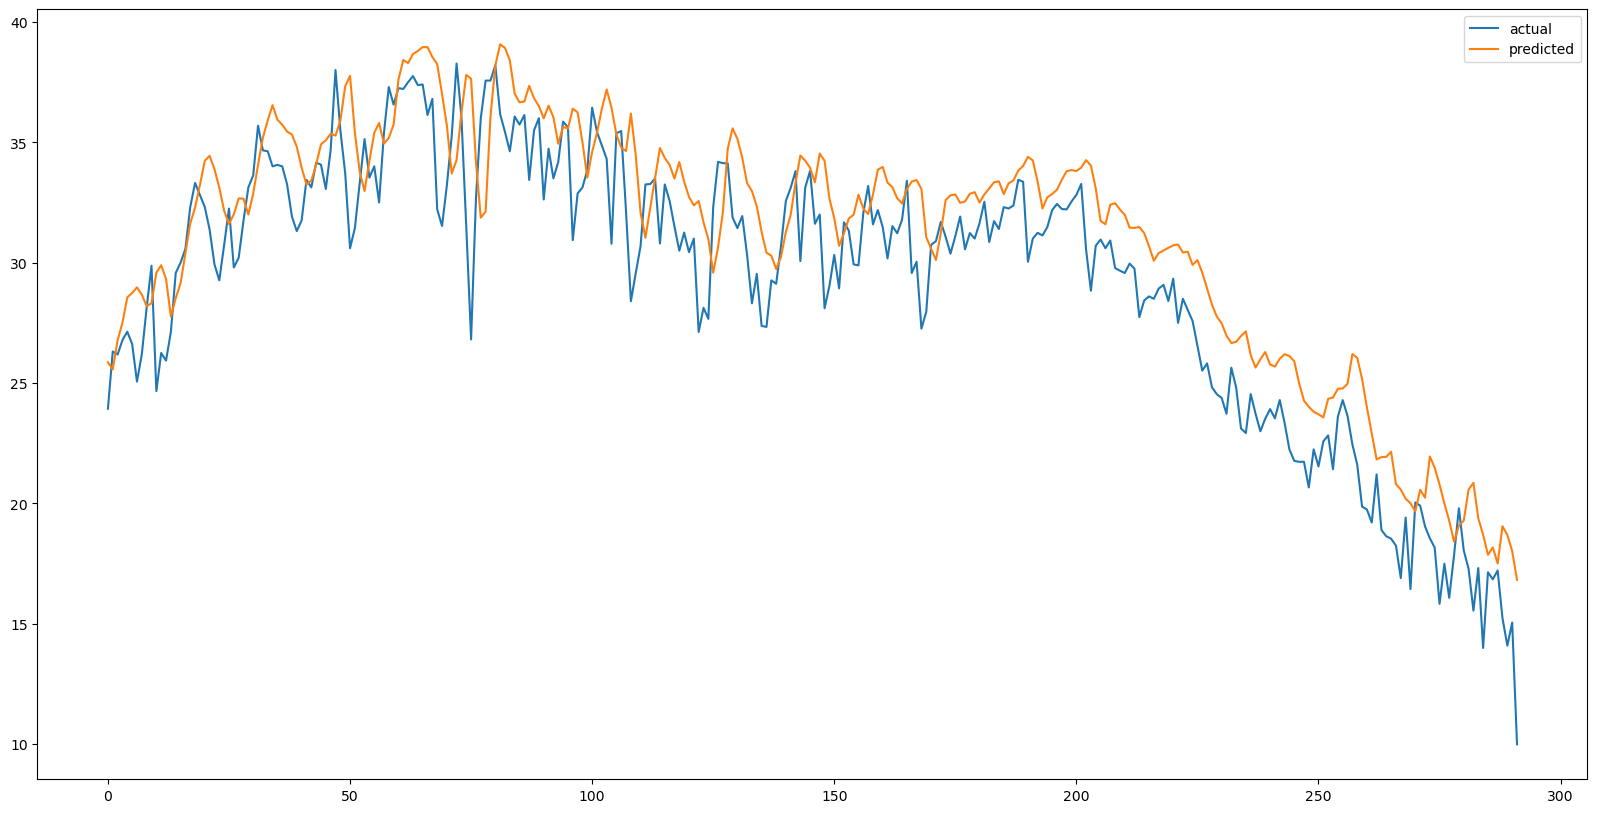

humidity Shape:  (1167, 3)
Epoch 1/20


C:\Users\223003\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2686 - mean_absolute_error: 0.4614 - mean_squared_error: 0.2686 - val_loss: 0.0081 - val_mean_absolute_error: 0.0748 - val_mean_squared_error: 0.0081
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0215 - mean_absolute_error: 0.1193 - mean_squared_error: 0.0215 - val_loss: 0.0079 - val_mean_absolute_error: 0.0731 - val_mean_squared_error: 0.0079
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183 - mean_absolute_error: 0.1092 - mean_squared_error: 0.0183 - val_loss: 0.0076 - val_mean_absolute_error: 0.0719 - val_mean_squared_error: 0.0076
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170 - mean_absolute_error: 0.1043 - mean_squared_error: 0.0170 - val_loss: 0.0076 - val_mean_absolute_error: 0.0718 - val_mean_squared_error: 0.0076
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 - mean_absolute_error: 0.1011 - mean_squared_error: 0.0161 - val_loss: 0.0078 - val_mean_absolute_error: 0

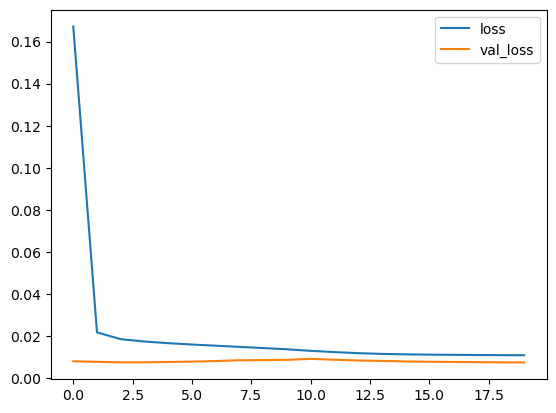

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


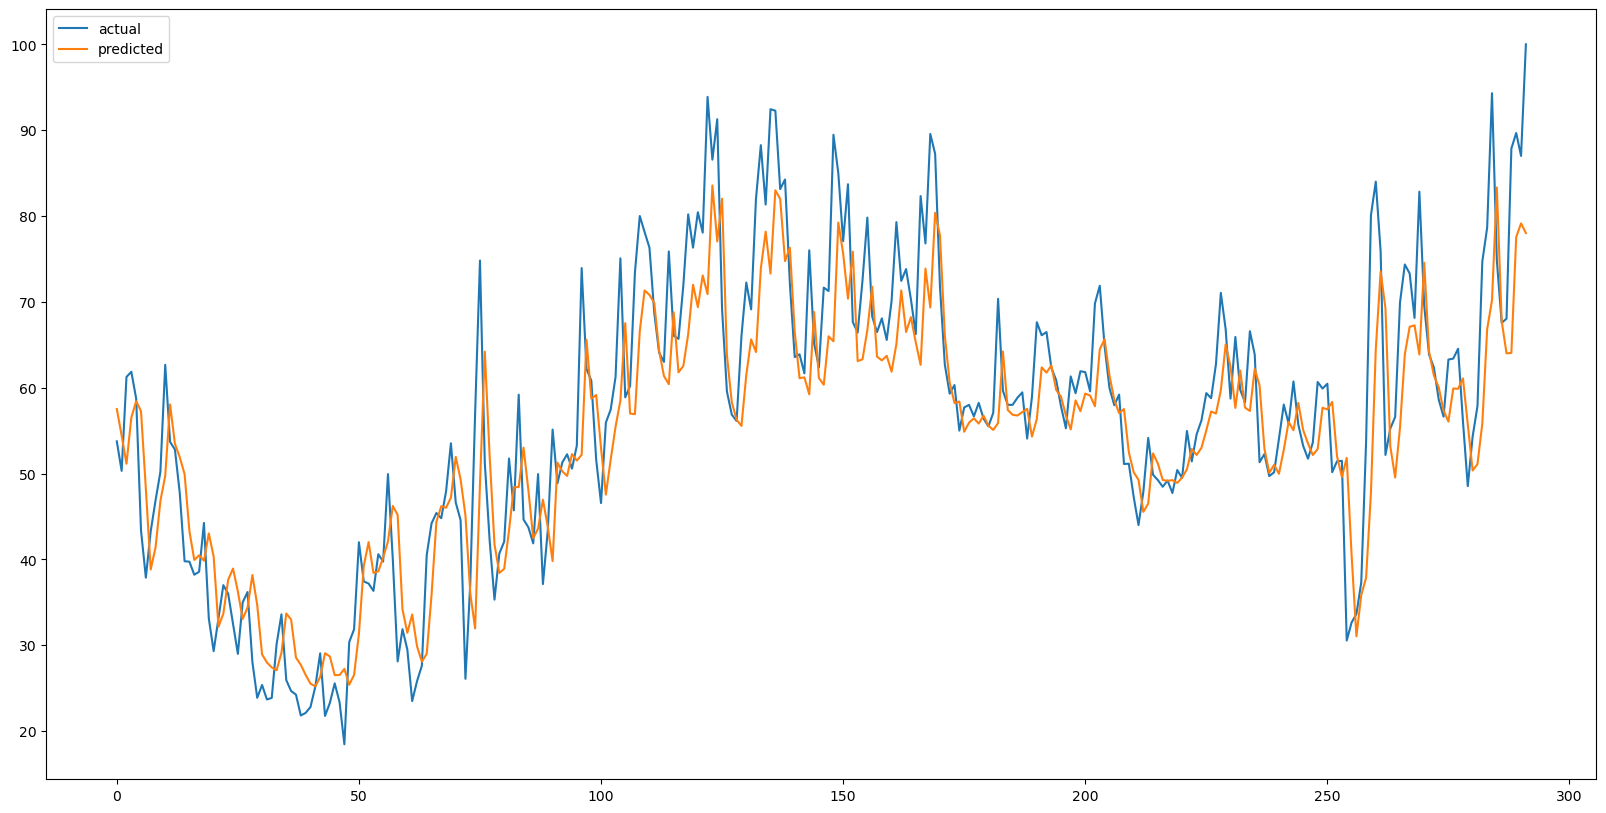

wind_speed Shape:  (1167, 3)
Epoch 1/20


C:\Users\223003\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.1221 - mean_squared_error: 0.0243 - val_loss: 0.0094 - val_mean_absolute_error: 0.0736 - val_mean_squared_error: 0.0094
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 - mean_absolute_error: 0.0809 - mean_squared_error: 0.0116 - val_loss: 0.0101 - val_mean_absolute_error: 0.0788 - val_mean_squared_error: 0.0101
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114 - mean_absolute_error: 0.0804 - mean_squared_error: 0.0114 - val_loss: 0.0100 - val_mean_absolute_error: 0.0783 - val_mean_squared_error: 0.0100
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113 - mean_absolute_error: 0.0800 - mean_squared_error: 0.0113 - val_loss: 0.0098 - val_mean_absolute_error: 0.0773 - val_mean_squared_error: 0.0098
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 - mean_absolute_error: 0.0795 - mean_squared_error: 0.0112 - val_loss: 0.0097 - val_mean_absolute_error: 

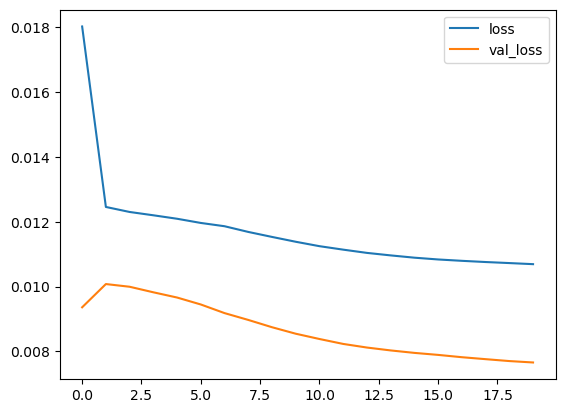

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


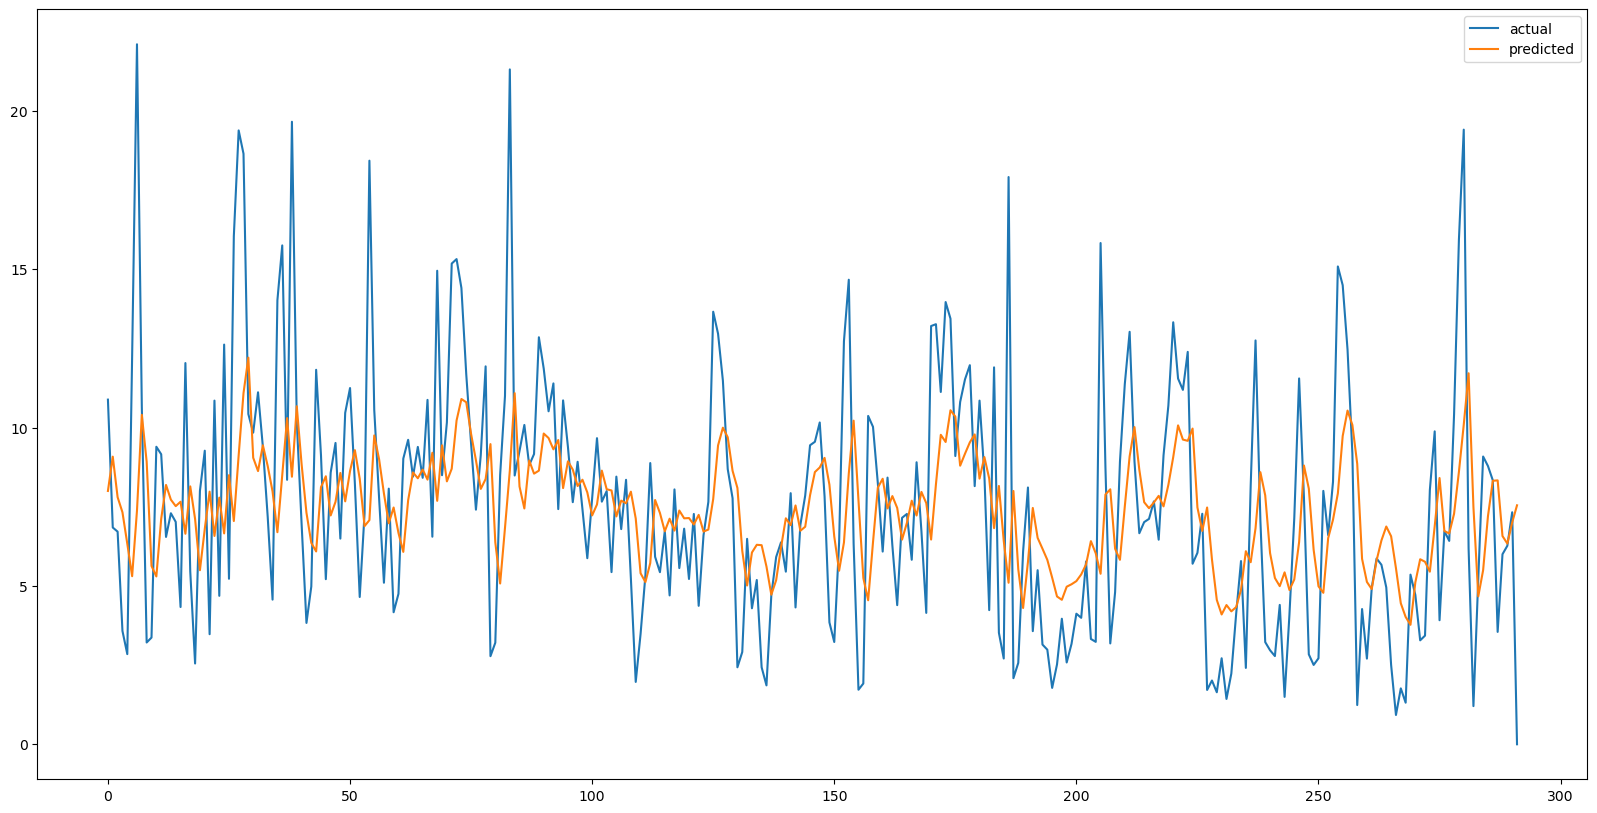

meanpressure Shape:  (1167, 3)
Epoch 1/20


C:\Users\223003\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2750 - mean_absolute_error: 0.4541 - mean_squared_error: 0.2750 - val_loss: 0.0190 - val_mean_absolute_error: 0.1192 - val_mean_squared_error: 0.0190
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0195 - mean_absolute_error: 0.1144 - mean_squared_error: 0.0195 - val_loss: 0.0078 - val_mean_absolute_error: 0.0730 - val_mean_squared_error: 0.0078
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102 - mean_absolute_error: 0.0830 - mean_squared_error: 0.0102 - val_loss: 0.0054 - val_mean_absolute_error: 0.0582 - val_mean_squared_error: 0.0054
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - mean_absolute_error: 0.0649 - mean_squared_error: 0.0068 - val_loss: 0.0060 - val_mean_absolute_error: 0.0603 - val_mean_squared_error: 0.0060
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - mean_absolute_error: 0.0632 - mean_squared_error: 0.0065 - val_loss: 0.0068 - val_mean_absolute_error: 0

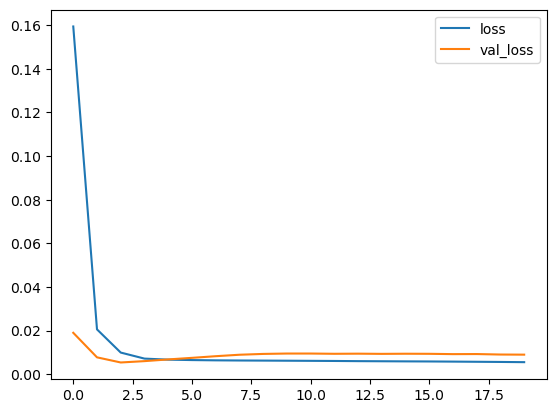

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


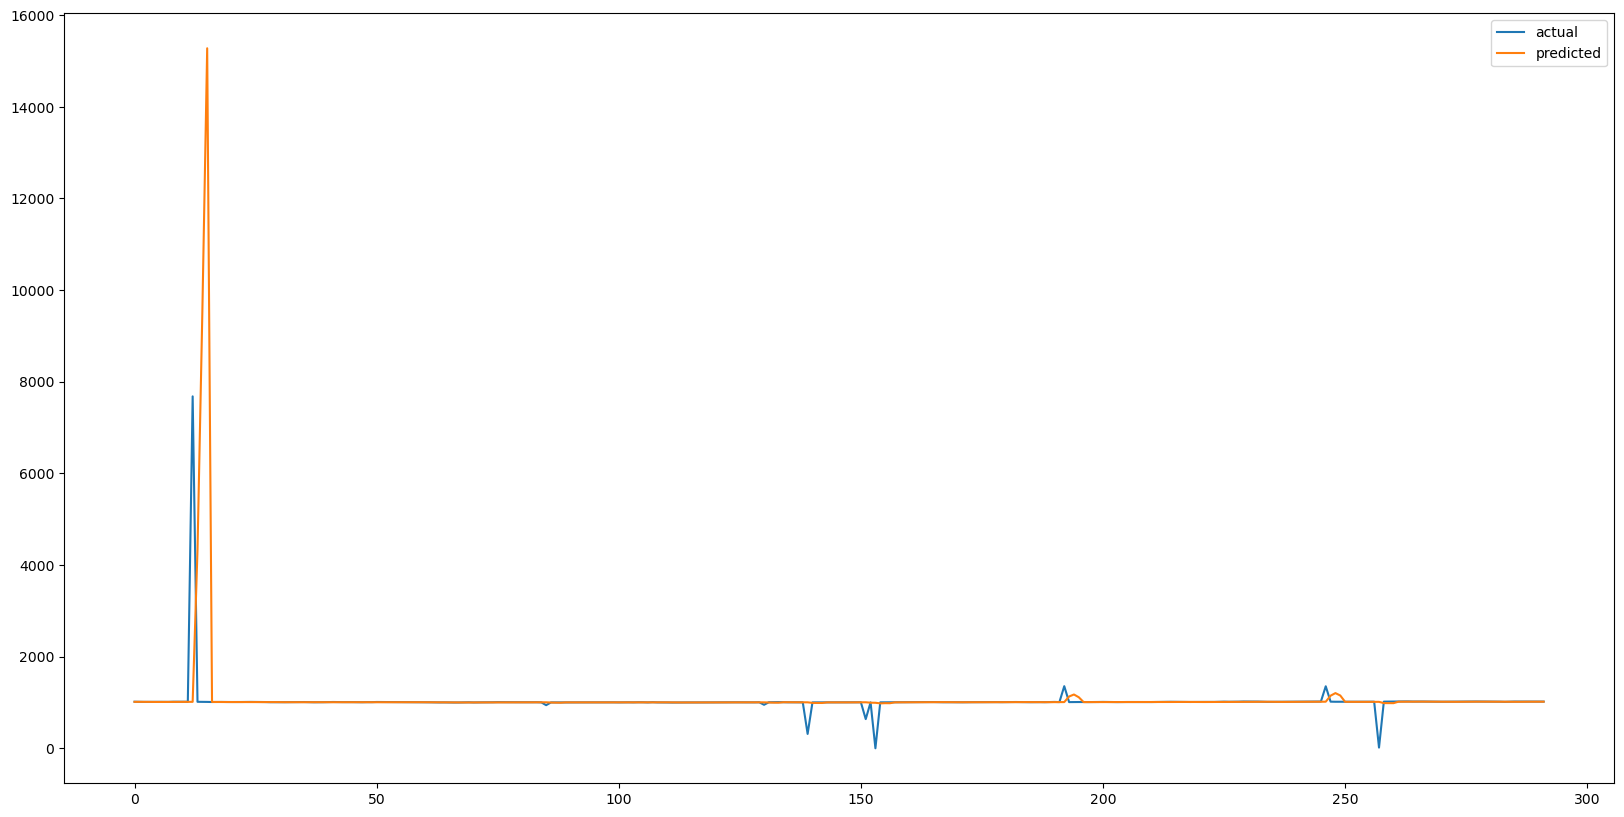

In [45]:
import keras
from keras.layers import LSTM

results = {}

for feature in features:
    X, Y = data[[f'{feature}_prev_3', f'{feature}_prev_2', f'{feature}_prev_1']], data[feature]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

    print(f'{feature} Shape: ', X_train.shape)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model = Sequential()
    model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(50,  activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ]) 

    history = model.fit(X_train, Y_train, batch_size=16, validation_split=0.2, epochs=20, shuffle=False)

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    preds = model.predict(X_test)
    preds = scaler.inverse_transform(preds)
    mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

    plt.figure(figsize=(20, 10))
    plt.plot(Y_test.values, label='actual')
    plt.plot(preds, label='predicted')
    plt.legend()
    plt.show()


## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [ ]:
# Write your code here. Add as many boxes as you need.

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [ ]:
# Write your code here. Add as many boxes as you need.

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [ ]:
# Write your code here. Add as many boxes as you need.

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As a bonus task for this laboratory exercise, calculate the Simple Moving Average (SMA) and Weighted Moving Average (WMA) with 3 timesteps for `mean_temperature` over the past 1, 2, and 3 days:

- **SMA with 3 timesteps ($\text{SMA}_3$)** - the average of temperatures from the previous 3 days:  
  $SMA_3 = \frac{\text{mean\_temperaure}_{lag\_3} +\ \text{mean\_temperaure}_{lag\_2} +\ \text{mean\_temperaure}_{lag\_1}}{1\ +\ 1\ +\ 1}$.

- **WMA with 3 timesteps ($\text{WMA}_3$)** - a weighted average, giving more importance to recent days:  
  $WMA_3 = \frac{1\ \cdot\ \text{mean\_temperaure}_{lag\_3} +\ 2\ \cdot\ \text{mean\_temperaure}_{lag\_2} +\ 3\ \cdot\ \text{mean\_temperaure}_{lag_1}}{1\ +\ 2\ +\ 3}$.

Then use this indicators alongside the other features in the dataset to predict the `mean_temperaure`.

*Hint: Use the `rolling` method from `pandas`. Check the docs at the following link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html.*

In [47]:
features_temperaure = [f'meantemp_prev_{i}' for feature in ['meantemp'] for i in range(lag, 0, -1)]
features_temperaure

['meantemp_prev_3', 'meantemp_prev_2', 'meantemp_prev_1']

In [57]:
data['meantemp'].rolling(3, min_periods=1, step=3).min()

date
2013-01-04     8.666667
2013-01-07     6.000000
2013-01-10     8.857143
2013-01-13    14.000000
2013-01-16    12.833333
                ...    
2016-12-20    16.083333
2016-12-23    15.550000
2016-12-26    14.000000
2016-12-29    15.238095
2017-01-01    10.000000
Name: meantemp, Length: 487, dtype: float64

In [59]:
data[features_temperaure].rolling(3, min_periods=1, step=3).min()

,meantemp_prev_3,meantemp_prev_2,meantemp_prev_1
date,,,
2013-01-04,10.000000,7.400000,7.166667
2013-01-07,7.166667,6.000000,6.000000
2013-01-10,6.000000,7.000000,7.000000
2013-01-13,8.857143,11.000000,11.000000
2013-01-16,14.000000,12.833333,12.833333
...,...,...,...
2016-12-20,15.833333,15.833333,16.083333
2016-12-23,16.083333,17.857143,17.285714
2016-12-26,15.550000,15.550000,14.000000


In [65]:
data['meantemp'].rolling(3, min_periods=1, step=3).mean()

date
2013-01-04     8.666667
2013-01-07     6.666667
2013-01-10    11.285714
2013-01-13    15.182540
2013-01-16    13.793651
                ...    
2016-12-20    17.913492
2016-12-23    16.961905
2016-12-26    16.153680
2016-12-29    16.435162
2017-01-01    13.049290
Name: meantemp, Length: 487, dtype: float64